In [ ]:
# Import libraries
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# The Dataset

Dataset: https://www.kaggle.com/shubh0799/churn-modelling

In [ ]:
# Read csv file into dataframe
df = pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# Concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Generate descriptive statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Exploratory and Visualization

In [ ]:
# Set the plot style
sns.set_style('whitegrid')

## Univariate Analysis

### CreditScore

In [ ]:
df[['CreditScore']].describe()

,CreditScore
count,10000.000000
mean,650.528800
std,96.653299
min,350.000000
25%,584.000000
50%,652.000000
75%,718.000000
max,850.000000


In [ ]:
df[['CreditScore']].mode().rename(index={0: 'Mode'})

,CreditScore
Mode,850


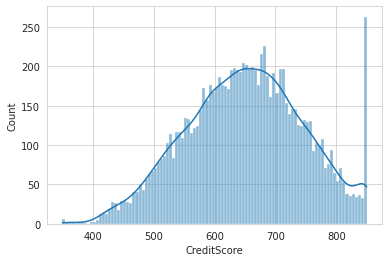

In [ ]:
sns.histplot(df['CreditScore'],bins=100,kde='True');

In [ ]:
# Menghitung rentang antar kuartil serta batas-batas pencilan
Q1 = df['CreditScore'].quantile(q = 0.25)
Q3 = df['CreditScore'].quantile(q = 0.75)
IQR = Q3 - Q1
UIF = Q3 + 1.5 * IQR
LIF = Q1 - 1.5 * IQR
UOF = Q3 + 3 * IQR
LOF = Q1 - 3 * IQR
print('Rentang antar kuartil: ', IQR)
print('Batas luar atas: ', UOF)
print('Batas dalam atas: ', UIF)
print('Batas dalam bawah: ', LIF)
print('Batas luar bawah: ', LOF)

Rentang antar kuartil:  134.0
Batas luar atas:  1120.0
Batas dalam atas:  919.0
Batas dalam bawah:  383.0
Batas luar bawah:  182.0


In [ ]:
# Mengidentifikasi pencilan di atas batas luar atas
print('Di atas batas luar atas:')
df['CreditScore'][df['CreditScore'] > UOF]

Di atas batas luar atas:


Series([], Name: CreditScore, dtype: int64)

In [ ]:
# Mengidentifikasi pencilan di atas batas dalam atas
print('Di atas batas dalam atas:')
df['CreditScore'][df['CreditScore'] > UIF]

Di atas batas dalam atas:


Series([], Name: CreditScore, dtype: int64)

In [ ]:
# Mengidentifikasi pencilan di bawah batas dalam bawah
print('Di bawah batas dalam bawah:')
df['CreditScore'][df['CreditScore'] < LIF]

Di bawah batas dalam bawah:


7       376
942     376
1193    363
1405    359
1631    350
1838    350
1962    358
2473    351
2579    365
8154    367
8723    350
8762    350
9210    382
9356    373
9624    350
Name: CreditScore, dtype: int64

In [ ]:
# Mengidentifikasi pencilan di bawah batas luar bawah
print('Di bawah batas luar bawah:')
df['CreditScore'][df['CreditScore'] < LOF]

Di bawah batas luar bawah:


Series([], Name: CreditScore, dtype: int64)

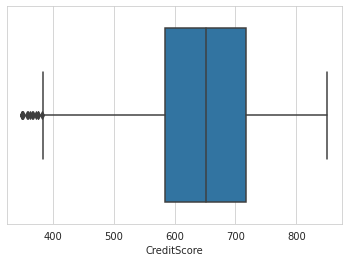

In [ ]:
sns.boxplot(x=df['CreditScore']);

### Geography

In [ ]:
df['Geography'].value_counts().rename_axis('Geography').to_frame('Count').sort_values(by='Geography')

,Count
Geography,
France,5014
Germany,2509
Spain,2477


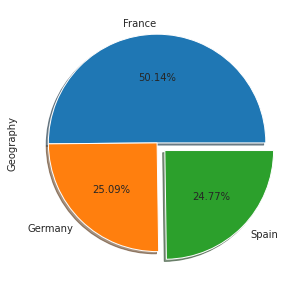

In [ ]:
df['Geography'].value_counts().plot.pie(explode=[0,0,0.1],labels=['France','Germany','Spain'],autopct='%.2f%%',shadow=True,figsize=(5,5));

### Gender

In [ ]:
df['Gender'].value_counts().rename_axis('Gender').to_frame('Count').sort_values(by='Gender')

,Count
Gender,
Female,4543
Male,5457


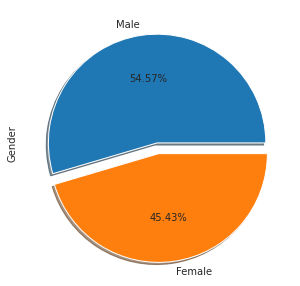

In [ ]:
df['Gender'].value_counts().plot.pie(explode=[0,0.1],labels=['Male','Female'],autopct='%.2f%%',shadow=True,figsize=(5,5));

### Age

In [ ]:
df[['Age']].describe()

,Age
count,10000.000000
mean,38.921800
std,10.487806
min,18.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,92.000000


In [ ]:
df[['Age']].mode().rename(index={0: 'Mode'})

,Age
Mode,37


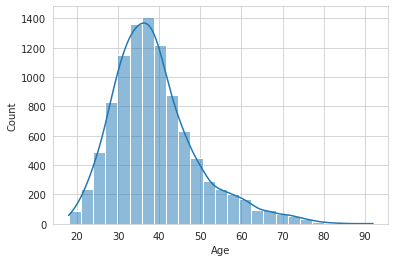

In [ ]:
sns.histplot(df['Age'],bins=25,kde='True');

In [ ]:
# Menghitung rentang antar kuartil serta batas-batas pencilan
Q1 = df['Age'].quantile(q = 0.25)
Q3 = df['Age'].quantile(q = 0.75)
IQR = Q3 - Q1
UIF = Q3 + 1.5 * IQR
LIF = Q1 - 1.5 * IQR
UOF = Q3 + 3 * IQR
LOF = Q1 - 3 * IQR
print('Rentang antar kuartil: ', IQR)
print('Batas luar atas: ', UOF)
print('Batas dalam atas: ', UIF)
print('Batas dalam bawah: ', LIF)
print('Batas luar bawah: ', LOF)

Rentang antar kuartil:  12.0
Batas luar atas:  80.0
Batas dalam atas:  62.0
Batas dalam bawah:  14.0
Batas luar bawah:  -4.0


In [ ]:
# Mengidentifikasi pencilan di atas batas luar atas
print('Di atas batas luar atas:')
df['Age'][df['Age'] > UOF]

Di atas batas luar atas:


766     82
2458    88
3033    85
3387    84
3531    84
4931    81
6443    92
6759    92
7526    81
7956    81
9080    81
9309    83
Name: Age, dtype: int64

In [ ]:
# Mengidentifikasi pencilan di atas batas dalam atas
print('Di atas batas dalam atas:')
df['Age'][df['Age'] > UIF]

Di atas batas dalam atas:


58      66
85      75
104     65
158     73
181     65
        ..
9753    68
9765    64
9832    64
9894    77
9936    77
Name: Age, Length: 359, dtype: int64

In [ ]:
# Mengidentifikasi pencilan di bawah batas dalam bawah
print('Di bawah batas dalam bawah:')
df['Age'][df['Age'] < LIF]

Di bawah batas dalam bawah:


Series([], Name: Age, dtype: int64)

In [ ]:
# Mengidentifikasi pencilan di bawah batas luar bawah
print('Di bawah batas luar bawah:')
df['Age'][df['Age'] < LOF]

Di bawah batas luar bawah:


Series([], Name: Age, dtype: int64)

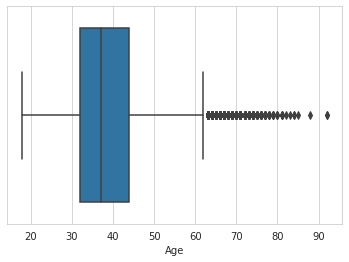

In [ ]:
sns.boxplot(x=df['Age']);

### Tenure

In [ ]:
df[['Tenure']].describe()

,Tenure
count,10000.000000
mean,5.012800
std,2.892174
min,0.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,10.000000


In [ ]:
df[['Tenure']].mode().rename(index={0: 'Mode'})

,Tenure
Mode,2


In [ ]:
df['Tenure'].value_counts().rename_axis('Tenure').to_frame('Count').sort_values(by='Tenure')

,Count
Tenure,
0,413
1,1035
2,1048
3,1009
4,989
5,1012
6,967
7,1028
8,1025


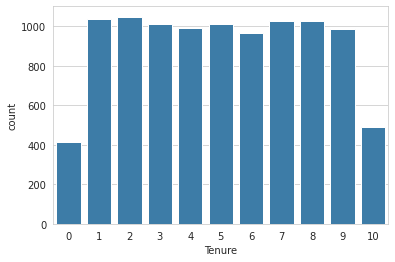

In [ ]:
sns.countplot(x=df['Tenure'],color='#2c7fb8');

In [ ]:
# Menghitung rentang antar kuartil serta batas-batas pencilan
Q1 = df['Tenure'].quantile(q = 0.25)
Q3 = df['Tenure'].quantile(q = 0.75)
IQR = Q3 - Q1
UIF = Q3 + 1.5 * IQR
LIF = Q1 - 1.5 * IQR
UOF = Q3 + 3 * IQR
LOF = Q1 - 3 * IQR
print('Rentang antar kuartil: ', IQR)
print('Batas luar atas: ', UOF)
print('Batas dalam atas: ', UIF)
print('Batas dalam bawah: ', LIF)
print('Batas luar bawah: ', LOF)

Rentang antar kuartil:  4.0
Batas luar atas:  19.0
Batas dalam atas:  13.0
Batas dalam bawah:  -3.0
Batas luar bawah:  -9.0


In [ ]:
# Mengidentifikasi pencilan di atas batas luar atas
print('Di atas batas luar atas:')
df['Tenure'][df['Tenure'] > UOF]

Di atas batas luar atas:


Series([], Name: Tenure, dtype: int64)

In [ ]:
# Mengidentifikasi pencilan di atas batas dalam atas
print('Di atas batas dalam atas:')
df['Tenure'][df['Tenure'] > UIF]

Di atas batas dalam atas:


Series([], Name: Tenure, dtype: int64)

In [ ]:
# Mengidentifikasi pencilan di bawah batas dalam bawah
print('Di bawah batas dalam bawah:')
df['Tenure'][df['Tenure'] < LIF]

Di bawah batas dalam bawah:


Series([], Name: Tenure, dtype: int64)

In [ ]:
# Mengidentifikasi pencilan di bawah batas luar bawah
print('Di bawah batas luar bawah:')
df['Tenure'][df['Tenure'] < LOF]

Di bawah batas luar bawah:


Series([], Name: Tenure, dtype: int64)

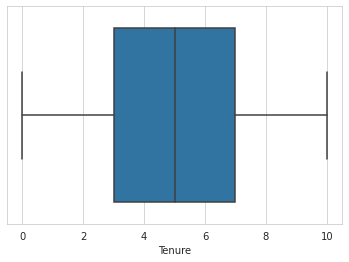

In [ ]:
sns.boxplot(x=df['Tenure']);

### Balance

In [ ]:
df[['Balance']].describe()

,Balance
count,10000.000000
mean,76485.889288
std,62397.405202
min,0.000000
25%,0.000000
50%,97198.540000
75%,127644.240000
max,250898.090000


In [ ]:
df[['Balance']].mode().rename(index={0: 'Mode'})

,Balance
Mode,0.0


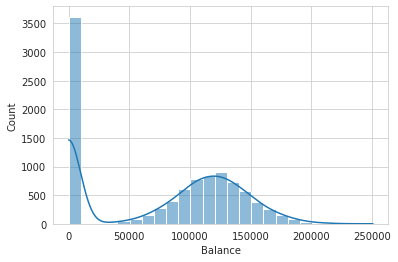

In [ ]:
sns.histplot(df['Balance'],bins=25,kde='True');

In [ ]:
# Menghitung rentang antar kuartil serta batas-batas pencilan
Q1 = df['Balance'].quantile(q = 0.25)
Q3 = df['Balance'].quantile(q = 0.75)
IQR = Q3 - Q1
UIF = Q3 + 1.5 * IQR
LIF = Q1 - 1.5 * IQR
UOF = Q3 + 3 * IQR
LOF = Q1 - 3 * IQR
print('Rentang antar kuartil: ', IQR)
print('Batas luar atas: ', UOF)
print('Batas dalam atas: ', UIF)
print('Batas dalam bawah: ', LIF)
print('Batas luar bawah: ', LOF)

Rentang antar kuartil:  127644.24
Batas luar atas:  510576.96
Batas dalam atas:  319110.60000000003
Batas dalam bawah:  -191466.36000000002
Batas luar bawah:  -382932.72000000003


In [ ]:
# Mengidentifikasi pencilan di atas batas luar atas
print('Di atas batas luar atas:')
df['Balance'][df['Balance'] > UOF]

Di atas batas luar atas:


Series([], Name: Balance, dtype: float64)

In [ ]:
# Mengidentifikasi pencilan di atas batas dalam atas
print('Di atas batas dalam atas:')
df['Balance'][df['Balance'] > UIF]

Di atas batas dalam atas:


Series([], Name: Balance, dtype: float64)

In [ ]:
# Mengidentifikasi pencilan di bawah batas dalam bawah
print('Di bawah batas dalam bawah:')
df['Balance'][df['Balance'] < LIF]

Di bawah batas dalam bawah:


Series([], Name: Balance, dtype: float64)

In [ ]:
# Mengidentifikasi pencilan di bawah batas luar bawah
print('Di bawah batas luar bawah:')
df['Balance'][df['Balance'] < LOF]

Di bawah batas luar bawah:


Series([], Name: Balance, dtype: float64)

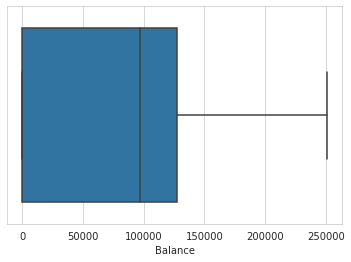

In [ ]:
sns.boxplot(x=df['Balance']);

### NumOfProducts

In [ ]:
df[['NumOfProducts']].describe()

,NumOfProducts
count,10000.000000
mean,1.530200
std,0.581654
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


In [ ]:
df[['NumOfProducts']].mode().rename(index={0: 'Mode'})

,NumOfProducts
Mode,1


In [ ]:
df['NumOfProducts'].value_counts().rename_axis('NumOfProducts').to_frame('Count').sort_values(by='NumOfProducts')

,Count
NumOfProducts,
1,5084
2,4590
3,266
4,60


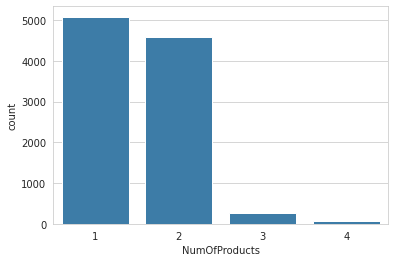

In [ ]:
sns.countplot(x=df['NumOfProducts'],color='#2c7fb8'); #8ebad9

In [ ]:
# Menghitung rentang antar kuartil serta batas-batas pencilan
Q1 = df['NumOfProducts'].quantile(q = 0.25)
Q3 = df['NumOfProducts'].quantile(q = 0.75)
IQR = Q3 - Q1
UIF = Q3 + 1.5 * IQR
LIF = Q1 - 1.5 * IQR
UOF = Q3 + 3 * IQR
LOF = Q1 - 3 * IQR
print('Rentang antar kuartil: ', IQR)
print('Batas luar atas: ', UOF)
print('Batas dalam atas: ', UIF)
print('Batas dalam bawah: ', LIF)
print('Batas luar bawah: ', LOF)

Rentang antar kuartil:  1.0
Batas luar atas:  5.0
Batas dalam atas:  3.5
Batas dalam bawah:  -0.5
Batas luar bawah:  -2.0


In [ ]:
# Mengidentifikasi pencilan di atas batas luar atas
print('Di atas batas luar atas:')
df['NumOfProducts'][df['NumOfProducts'] > UOF]

Di atas batas luar atas:


Series([], Name: NumOfProducts, dtype: int64)

In [ ]:
# Mengidentifikasi pencilan di atas batas dalam atas
print('Di atas batas dalam atas:')
df['NumOfProducts'][df['NumOfProducts'] > UIF]

Di atas batas dalam atas:


7       4
70      4
1254    4
1469    4
1488    4
1701    4
1876    4
2124    4
2196    4
2285    4
2462    4
2499    4
2509    4
2541    4
2614    4
2617    4
2872    4
3152    4
3365    4
3841    4
4013    4
4014    4
4166    4
4260    4
4403    4
4511    4
4516    4
4606    4
4654    4
4748    4
4822    4
5010    4
5137    4
5235    4
5386    4
5700    4
5904    4
6150    4
6172    4
6279    4
6750    4
6875    4
7257    4
7457    4
7567    4
7698    4
7724    4
7729    4
8041    4
8590    4
8683    4
8850    4
8923    4
9215    4
9255    4
9323    4
9370    4
9411    4
9540    4
9565    4
Name: NumOfProducts, dtype: int64

In [ ]:
# Mengidentifikasi pencilan di bawah batas dalam bawah
print('Di bawah batas dalam bawah:')
df['NumOfProducts'][df['NumOfProducts'] < LIF]

Di bawah batas dalam bawah:


Series([], Name: NumOfProducts, dtype: int64)

In [ ]:
# Mengidentifikasi pencilan di bawah batas luar bawah
print('Di bawah batas luar bawah:')
df['NumOfProducts'][df['NumOfProducts'] < LOF]

Di bawah batas luar bawah:


Series([], Name: NumOfProducts, dtype: int64)

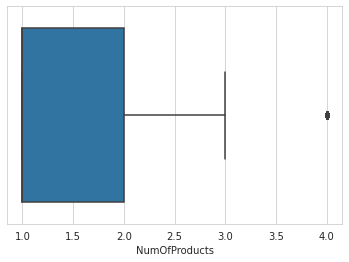

In [ ]:
sns.boxplot(x=df['NumOfProducts']);

### HasCrCard

In [ ]:
df['HasCrCard'].value_counts().rename_axis('HasCrCard').to_frame('Count').rename(index={0:'0 (No)', 1:'1 (Yes)'}).sort_values(by='HasCrCard')

,Count
HasCrCard,
0 (No),2945
1 (Yes),7055


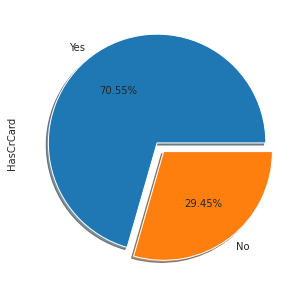

In [ ]:
df['HasCrCard'].value_counts().plot.pie(explode=[0,0.1],labels=['Yes','No'],autopct='%.2f%%',shadow=True,figsize=(5,5));

### IsActiveMember

In [ ]:
df['IsActiveMember'].value_counts().rename_axis('IsActiveMember').to_frame('Count').rename(index={0:'0 (No)', 1:'1 (Yes)'}).sort_values(by='IsActiveMember')

,Count
IsActiveMember,
0 (No),4849
1 (Yes),5151


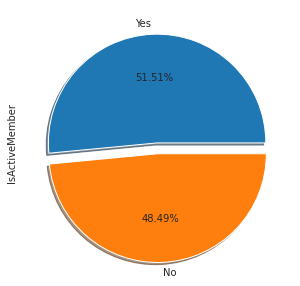

In [ ]:
df['IsActiveMember'].value_counts().plot.pie(explode=[0,0.1],labels=['Yes','No'],autopct='%.2f%%',shadow=True,figsize=(5,5));

### EstimatedSalary

In [ ]:
df[['EstimatedSalary']].describe()

,EstimatedSalary
count,10000.000000
mean,100090.239881
std,57510.492818
min,11.580000
25%,51002.110000
50%,100193.915000
75%,149388.247500
max,199992.480000


In [ ]:
df[['EstimatedSalary']].mode().rename(index={0: 'Mode'})

,EstimatedSalary
Mode,24924.92


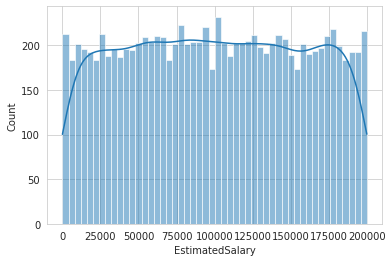

In [ ]:
sns.histplot(df['EstimatedSalary'],bins=50,kde='True');

In [ ]:
# Menghitung rentang antar kuartil serta batas-batas pencilan
Q1 = df['EstimatedSalary'].quantile(q = 0.25)
Q3 = df['EstimatedSalary'].quantile(q = 0.75)
IQR = Q3 - Q1
UIF = Q3 + 1.5 * IQR
LIF = Q1 - 1.5 * IQR
UOF = Q3 + 3 * IQR
LOF = Q1 - 3 * IQR
print('Rentang antar kuartil: ', IQR)
print('Batas luar atas: ', UOF)
print('Batas dalam atas: ', UIF)
print('Batas dalam bawah: ', LIF)
print('Batas luar bawah: ', LOF)

Rentang antar kuartil:  98386.1375
Batas luar atas:  444546.66
Batas dalam atas:  296967.45375
Batas dalam bawah:  -96577.09624999999
Batas luar bawah:  -244156.3025


In [ ]:
# Mengidentifikasi pencilan di atas batas luar atas
print('Di atas batas luar atas:')
df['EstimatedSalary'][df['EstimatedSalary'] > UOF]

Di atas batas luar atas:


Series([], Name: EstimatedSalary, dtype: float64)

In [ ]:
# Mengidentifikasi pencilan di atas batas dalam atas
print('Di atas batas dalam atas:')
df['EstimatedSalary'][df['EstimatedSalary'] > UIF]

Di atas batas dalam atas:


Series([], Name: EstimatedSalary, dtype: float64)

In [ ]:
# Mengidentifikasi pencilan di bawah batas dalam bawah
print('Di bawah batas dalam bawah:')
df['EstimatedSalary'][df['EstimatedSalary'] < LIF]

Di bawah batas dalam bawah:


Series([], Name: EstimatedSalary, dtype: float64)

In [ ]:
# Mengidentifikasi pencilan di bawah batas luar bawah
print('Di bawah batas luar bawah:')
df['EstimatedSalary'][df['EstimatedSalary'] < LOF]

Di bawah batas luar bawah:


Series([], Name: EstimatedSalary, dtype: float64)

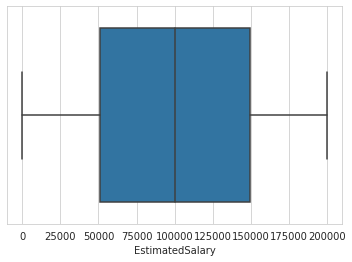

In [ ]:
sns.boxplot(x=df['EstimatedSalary']);

### Exited

In [ ]:
df['Exited'].value_counts().rename_axis('Exited').to_frame('Count').rename(index={0:'0 (No)', 1:'1 (Yes)'}).sort_values(by='Exited')

,Count
Exited,
0 (No),7963
1 (Yes),2037


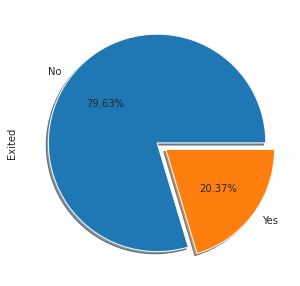

In [ ]:
df['Exited'].value_counts().plot.pie(explode=[0,0.1],labels=['No','Yes'],autopct='%.2f%%',shadow=True,figsize=(5,5));

## Bivariate Analysis

### CreditScore, Exited

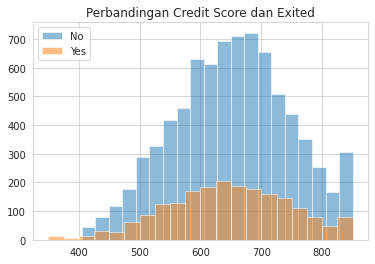

In [ ]:
df[df.Exited == 0]['CreditScore'].hist(bins=20, alpha=0.5);
df[df.Exited == 1]['CreditScore'].hist(bins=20, alpha=0.5);
plt.legend(labels=['No', 'Yes'], loc='upper left');
plt.title('Perbandingan Credit Score dan Exited');

### Geography, Exited

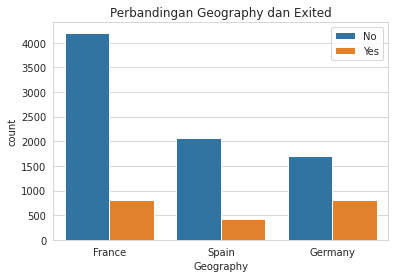

In [ ]:
sns.countplot(data=df, x='Geography', hue='Exited');
plt.legend(labels=['No', 'Yes'], loc='upper right');
plt.title('Perbandingan Geography dan Exited');

### Gender, Exited

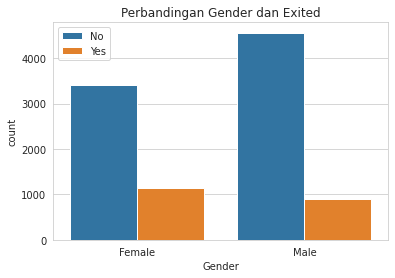

In [ ]:
sns.countplot(data=df, x='Gender', hue='Exited');
plt.legend(labels=['No', 'Yes'], loc='upper left');
plt.title('Perbandingan Gender dan Exited');

### Age, Exited

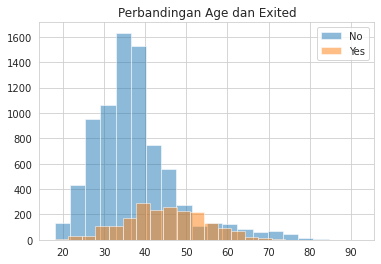

In [ ]:
df[df.Exited == 0]['Age'].hist(bins=20, alpha=0.5);
df[df.Exited == 1]['Age'].hist(bins=20, alpha=0.5);
plt.legend(labels=['No', 'Yes'], loc='upper right');
plt.title('Perbandingan Age dan Exited');

### Tenure, Exited

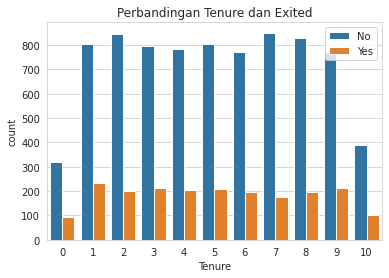

In [ ]:
sns.countplot(data=df, x='Tenure', hue='Exited');
plt.legend(labels=['No', 'Yes'], loc='upper right');
plt.title('Perbandingan Tenure dan Exited');

### Balance, Exited

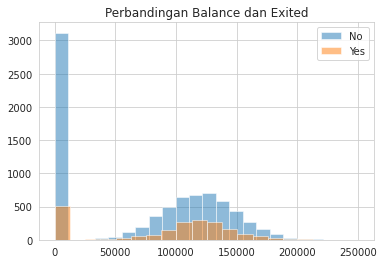

In [ ]:
df[df.Exited == 0]['Balance'].hist(bins=20, alpha=0.5);
df[df.Exited == 1]['Balance'].hist(bins=20, alpha=0.5);
plt.legend(labels=['No', 'Yes'], loc='upper right');
plt.title('Perbandingan Balance dan Exited');

### NumOfProducts, Exited

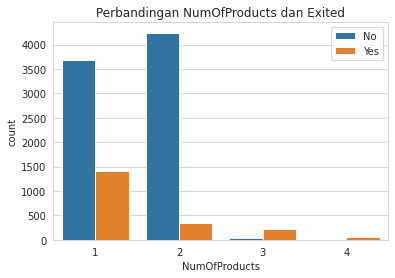

In [ ]:
sns.countplot(data=df, x='NumOfProducts', hue='Exited');
plt.legend(labels=['No', 'Yes'], loc='upper right');
plt.title('Perbandingan NumOfProducts dan Exited');

### HasCrCard, Exited

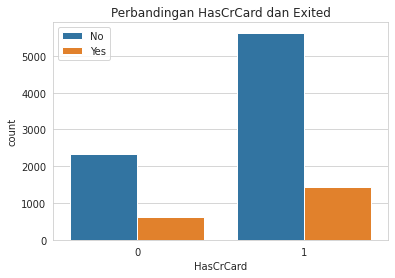

In [ ]:
sns.countplot(data=df, x='HasCrCard', hue='Exited');
plt.legend(labels=['No', 'Yes'], loc='upper left');
plt.title('Perbandingan HasCrCard dan Exited');

### IsActiveMember, Exited

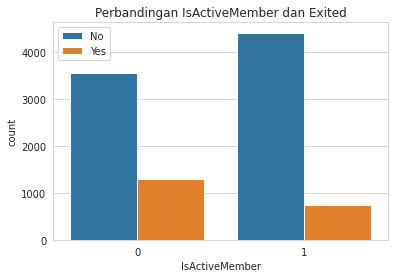

In [ ]:
sns.countplot(data=df, x='IsActiveMember', hue='Exited');
plt.legend(labels=['No', 'Yes'], loc='upper left');
plt.title('Perbandingan IsActiveMember dan Exited');

### EstimatedSalary, Exited

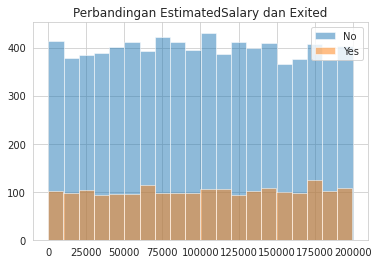

In [ ]:
df[df.Exited == 0]['EstimatedSalary'].hist(bins=20, alpha=0.5);
df[df.Exited == 1]['EstimatedSalary'].hist(bins=20, alpha=0.5);
plt.legend(labels=['No', 'Yes'], loc='upper right');
plt.title('Perbandingan EstimatedSalary dan Exited');

## Correlation Coefficient

### Spearman

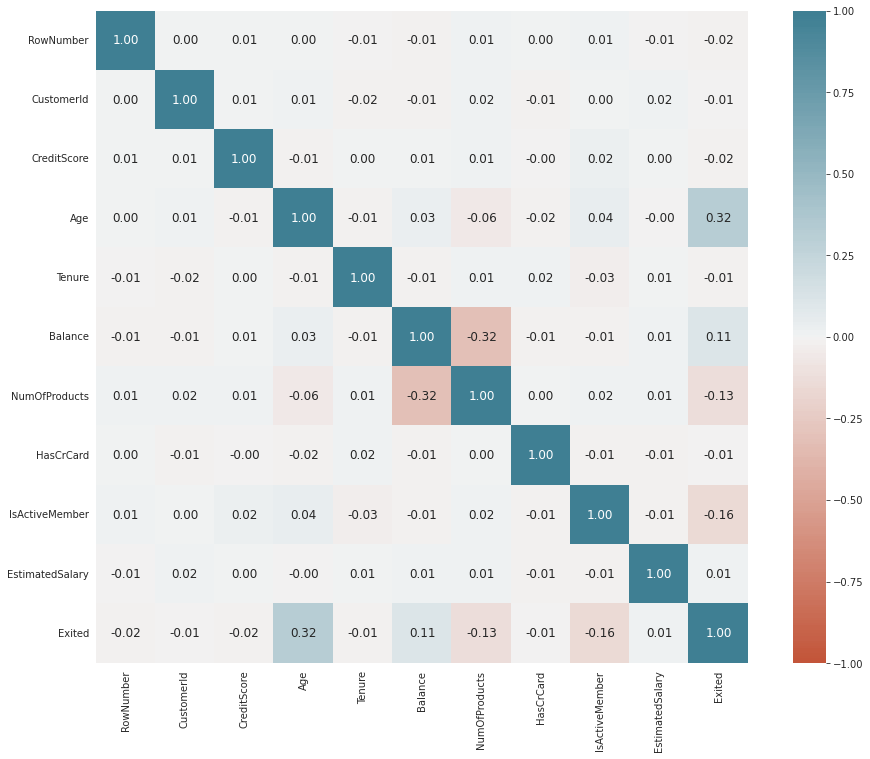

In [ ]:
plt.subplots(figsize=(16,12))
sns.heatmap(df.corr(method = 'spearman'), annot=True, annot_kws={"size":12}, fmt='.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True);

# Data Preprocessing

## Handling Missing Values

In [ ]:
# Melakukan pengecekan missing values
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


## Handling Duplicate Values

In [ ]:
# Melakukan pengecekan duplicate values
print(df.duplicated().sum())

0


## Remove Unnecessary Columns

In [ ]:
# Menghapus kolom RowNumber, CustomerId, dan Surname karena tidak dibutuhkan
df = df.drop(['RowNumber','CustomerId','Surname'], 1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Encoding Categorical Features

In [ ]:
# Mengubah feature kategorikal, Geography, menjadi numerikal (one hot encoding)
df[['France','Spain','Germany']] = pd.get_dummies(df['Geography'])
df = df.drop('Geography', 1)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Spain,Germany
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [ ]:
# Mengubah feature kategorikal, Gender, menjadi numerikal (label encoding)
df['Gender'] = [0 if i == 'Female' else 1 for i in df['Gender']]
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Spain,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


## Splitting Dataset

In [ ]:
# Membagi dataset berdasarkan feature predictor dan target
x = df.drop('Exited', 1)
y = df[['Exited']]

In [ ]:
# Feature predictor
print(x)

      CreditScore  Gender  Age  Tenure  ...  EstimatedSalary  France  Spain  Germany
0             619       0   42       2  ...        101348.88       1      0        0
1             608       0   41       1  ...        112542.58       0      0        1
2             502       0   42       8  ...        113931.57       1      0        0
3             699       0   39       1  ...         93826.63       1      0        0
4             850       0   43       2  ...         79084.10       0      0        1
...           ...     ...  ...     ...  ...              ...     ...    ...      ...
9995          771       1   39       5  ...         96270.64       1      0        0
9996          516       1   35      10  ...        101699.77       1      0        0
9997          709       0   36       7  ...         42085.58       1      0        0
9998          772       1   42       3  ...         92888.52       0      1        0
9999          792       0   28       4  ...         38190.78     

In [ ]:
# Feature target
print(y)

      Exited
0          1
1          0
2          1
3          0
4          0
...      ...
9995       0
9996       0
9997       1
9998       1
9999       0

[10000 rows x 1 columns]


In [ ]:
# Membagi dataset berdasarkan data train dan data test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=62, stratify=y)

In [ ]:
# Data train feature predictor
print(x_train)

      CreditScore  Gender  Age  Tenure  ...  EstimatedSalary  France  Spain  Germany
4428          602       0   35       5  ...         31050.02       1      0        0
5361          589       1   46       9  ...        170676.67       1      0        0
2542          549       1   41       9  ...        131710.59       0      1        0
6837          664       1   40       9  ...        194767.30       1      0        0
6155          759       1   26       4  ...        135394.62       1      0        0
...           ...     ...  ...     ...  ...              ...     ...    ...      ...
7291          599       1   33       4  ...        111622.76       0      0        1
4033          632       1   48       6  ...         64345.61       0      1        0
7361          692       0   36       4  ...        185580.89       1      0        0
5170          814       0   31       4  ...        142029.17       1      0        0
5834          793       1   32       2  ...        193817.63     

In [ ]:
# Data test feature predictor
print(x_test)

      CreditScore  Gender  Age  Tenure  ...  EstimatedSalary  France  Spain  Germany
5895          738       1   37       7  ...        195333.98       0      1        0
1371          611       0   43       8  ...        114996.33       1      0        0
6133          667       0   33       4  ...         69011.66       0      1        0
3238          675       1   54       6  ...        110273.84       1      0        0
6633          729       0   42       7  ...         58268.20       0      0        1
...           ...     ...  ...     ...  ...              ...     ...    ...      ...
3056          685       1   58       1  ...        154181.41       1      0        0
7285          679       1   29       3  ...         63687.06       1      0        0
4357          755       1   36       8  ...        176809.87       1      0        0
183           636       1   42       2  ...         55470.78       1      0        0
8192          589       1   36       8  ...         26955.72     

In [ ]:
# Data train feature target
print(y_train)

      Exited
4428       0
5361       0
2542       1
6837       0
6155       0
...      ...
7291       1
4033       1
7361       1
5170       0
5834       1

[8000 rows x 1 columns]


In [ ]:
# Data test feature target
print(y_test)

      Exited
5895       0
1371       0
6133       0
3238       1
6633       1
...      ...
3056       0
7285       0
4357       0
183        0
8192       0

[2000 rows x 1 columns]


## Feature Scaling

In [ ]:
# Melakukan standarisasi pada data train
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_train

array([[-0.4947136 , -1.0952694 , -0.37577777, ...,  0.99401789,
        -0.57831252, -0.57176909],
       [-0.62969543,  0.91301738,  0.67321486, ...,  0.99401789,
        -0.57831252, -0.57176909],
       [-1.04502414,  0.91301738,  0.19640003, ..., -1.00601811,
         1.72916886, -0.57176909],
       ...,
       [ 0.43977599, -1.0952694 , -0.2804148 , ...,  0.99401789,
        -0.57831252, -0.57176909],
       [ 1.70652855, -1.0952694 , -0.75722963, ...,  0.99401789,
        -0.57831252, -0.57176909],
       [ 1.48848098,  0.91301738, -0.66186667, ...,  0.99401789,
        -0.57831252, -0.57176909]])

In [ ]:
# Melakukan standarisasi pada data test feature predictor
x_test = sc.transform(x_test)
x_test

array([[ 0.91740401,  0.91301738, -0.18505184, ..., -1.00601811,
         1.72916886, -0.57176909],
       [-0.40126464, -1.0952694 ,  0.38712596, ...,  0.99401789,
        -0.57831252, -0.57176909],
       [ 0.18019555, -1.0952694 , -0.5665037 , ..., -1.00601811,
         1.72916886, -0.57176909],
       ...,
       [ 1.09391871,  0.91301738, -0.2804148 , ...,  0.99401789,
        -0.57831252, -0.57176909],
       [-0.1416842 ,  0.91301738,  0.291763  , ...,  0.99401789,
        -0.57831252, -0.57176909],
       [-0.62969543,  0.91301738, -0.2804148 , ...,  0.99401789,
        -0.57831252, -0.57176909]])

## Handling Imbalance Dataset

In [ ]:
# Mengatasi imbalance dataset dengan SMOTETomek
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=62)
x_train, y_train = smt.fit_resample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

In [ ]:
Counter(y_train)

Counter({0: 6276, 1: 6276})

# Develop Model and Evaluation

## Confusion Matrix

In [ ]:
# Fungsi matriks evaluasi yang digunakan
def class_eval (act, pred, name):
    cm = confusion_matrix(act, pred)
    tn = cm[0][0]
    fp = cm[0][1]    
    fn = cm[1][0]
    tp = cm[1][1]

    accuracy = round((tp + tn) / (tp + tn + fp + fn) * 100, 2)
    precision = round((tp) / (tp + fp) * 100, 2)
    recall = round((tp) / (tp + fn) * 100, 2)
    # npv = round((tn) / (tn + fn) * 100, 2)
    # pecificity = round((tn) / (tn + fp) * 100, 2)
    f1score = round(2 * (precision * recall) / (precision + recall), 2)
        
    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy :', accuracy, '%')
    print('Precision:', precision, '%')
    print('Recall   :', recall, '%')
    # print('NPV        :', npv, '%')
    # print('Specificity:', specificity, '%')
    print('F1-Score :', f1score, '%')

## KNN

In [ ]:
# Melakukan data training
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')

In [ ]:
# Prediksi data train dan data test
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [ ]:
# Melihat performa data training
class_eval(y_train, y_train_pred, 'KNN Training Perf.')

Evaluation Model: KNN Training Perf.
[[4830 1446]
 [ 869 5407]]
Accuracy : 81.56 %
Precision: 78.9 %
Recall   : 86.15 %
F1-Score : 82.37 %


In [ ]:
# Melihat performa data testing
class_eval(y_test, y_test_pred, 'KNN Testing Perf.')

Evaluation Model: KNN Testing Perf.
[[1199  394]
 [  99  308]]
Accuracy : 75.35 %
Precision: 43.87 %
Recall   : 75.68 %
F1-Score : 55.54 %


## Decision Tree

In [ ]:
# Melakukan data training
dectree = DecisionTreeClassifier(max_depth=5,random_state=62)
dectree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=62, splitter='best')

In [ ]:
# Prediksi data train dan data test
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

In [ ]:
# Melihat performa data training
class_eval(y_train, y_train_pred, 'Dectree Training Perf.')

Evaluation Model: Dectree Training Perf.
[[5037 1239]
 [1333 4943]]
Accuracy : 79.51 %
Precision: 79.96 %
Recall   : 78.76 %
F1-Score : 79.36 %


In [ ]:
# Melihat performa data testing
class_eval(y_test, y_test_pred, 'Dectree Testing Perf.')

Evaluation Model: Dectree Testing Perf.
[[1273  320]
 [ 104  303]]
Accuracy : 78.8 %
Precision: 48.64 %
Recall   : 74.45 %
F1-Score : 58.84 %


## Random Forest

In [ ]:
# Melakukan data training
ranfor = RandomForestClassifier(max_depth=6,random_state=62)
ranfor.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=62, verbose=0,
                       warm_start=False)

In [ ]:
# Prediksi data train dan data test
y_train_pred = ranfor.predict(x_train)
y_test_pred = ranfor.predict(x_test)

In [ ]:
# Melihat performa data training
class_eval(y_train, y_train_pred, 'Ranfor Training Perf.')

Evaluation Model: Ranfor Training Perf.
[[5282  994]
 [1139 5137]]
Accuracy : 83.01 %
Precision: 83.79 %
Recall   : 81.85 %
F1-Score : 82.81 %


In [ ]:
# Melihat performa data testing
class_eval(y_test, y_test_pred, 'Ranfor Testing Perf.')

Evaluation Model: Ranfor Testing Perf.
[[1307  286]
 [ 104  303]]
Accuracy : 80.5 %
Precision: 51.44 %
Recall   : 74.45 %
F1-Score : 60.84 %


## Bagging Classifier

In [ ]:
# Melakukan data training
clf = BaggingClassifier(base_estimator=SVC(kernel='rbf', C=1, random_state=62))
clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=SVC(C=1, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=62,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [ ]:
# Prediksi data train dan data test
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [ ]:
# Melihat performa data training
class_eval(y_train, y_train_pred, 'Bagging Class Training Perf.')

Evaluation Model: Bagging Class Training Perf.
[[5227 1049]
 [1108 5168]]
Accuracy : 82.82 %
Precision: 83.13 %
Recall   : 82.35 %
F1-Score : 82.74 %


In [ ]:
# Melihat performa data testing
class_eval(y_test, y_test_pred, 'Bagging Class Testing Perf.')

Evaluation Model: Bagging Class Testing Perf.
[[1303  290]
 [ 106  301]]
Accuracy : 80.2 %
Precision: 50.93 %
Recall   : 73.96 %
F1-Score : 60.32 %


## Adaboost

In [ ]:
# Melakukan data training
ada = AdaBoostClassifier(learning_rate=1.0,n_estimators=100)
ada.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [ ]:
# Prediksi data train dan data test
y_train_pred = ada.predict(x_train)
y_test_pred = ada.predict(x_test)

In [ ]:
# Melihat performa data training
class_eval(y_train, y_train_pred, 'Adaboost Class Training Perf.')

Evaluation Model: Adaboost Class Training Perf.
[[5360  916]
 [1015 5261]]
Accuracy : 84.62 %
Precision: 85.17 %
Recall   : 83.83 %
F1-Score : 84.49 %


In [ ]:
# Melihat performa data testing
class_eval(y_test, y_test_pred, 'Adaboost Class Testing Perf.')

Evaluation Model: Adaboost Class Testing Perf.
[[1341  252]
 [ 123  284]]
Accuracy : 81.25 %
Precision: 52.99 %
Recall   : 69.78 %
F1-Score : 60.24 %


## XGBoost

In [ ]:
# Melakukan data training
xg = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, 
                       objective='binary:logistic', random_state=42)
xg.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, earning_rate=0.1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Prediksi data train dan data test
y_train_pred = xg.predict(x_train)
y_test_pred = xg.predict(x_test)

In [ ]:
# Melihat performa data training
class_eval(y_train, y_train_pred, 'XGBoost Class Training Perf.')

Evaluation Model: XGBoost Class Training Perf.
[[5533  743]
 [ 849 5427]]
Accuracy : 87.32 %
Precision: 87.96 %
Recall   : 86.47 %
F1-Score : 87.21 %


In [ ]:
# Melihat performa data testing
class_eval(y_test, y_test_pred, 'XGBoost Class Testing Perf.')

Evaluation Model: XGBoost Class Testing Perf.
[[1388  205]
 [ 118  289]]
Accuracy : 83.85 %
Precision: 58.5 %
Recall   : 71.01 %
F1-Score : 64.15 %


# Hyperparameter Tuning

## Random Forest

In [ ]:
# Mencoba hyperparameter tuning
param_random = {'max_depth': [4,5,6,7,8],
                'n_estimators': [600,700,800,900,1000],
                'min_samples_leaf': [1,2,3], 
                'min_samples_split': [2,3,4]
                }
random_search_ranfor = RandomizedSearchCV(estimator=ranfor, param_distributions=param_random,
                                          cv=10, random_state=62, n_jobs=-1, scoring='f1')
random_search_ranfor.fit(x_train, y_train)
random_search_ranfor.best_params_

{'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 900}

In [ ]:
# Melihat performa setelah hyperparameter tuning
rs_ranfor = random_search_ranfor.best_estimator_
y_test_pred = rs_ranfor.predict(x_test)
class_eval(y_test, y_test_pred, 'Ranfor Hyperparameter Tuning Perf.')

Evaluation Model: Ranfor Hyperparameter Tuning Perf.
[[1352  241]
 [ 106  301]]
Accuracy : 82.65 %
Precision: 55.54 %
Recall   : 73.96 %
F1-Score : 63.44 %


## XGBoost

In [ ]:
# Mencoba hyperparameter tuning
param_random = {'learning_rate': [0.001, 0.01, 0.1],
                'max_depth': [2,3,4],
                'n_estimators': [100, 200, 300, 400, 500]}
random_search_xg = RandomizedSearchCV(estimator=xg, param_distributions=param_random,
                                      cv=10, random_state=62, n_jobs=-1, scoring='f1')
random_search_xg.fit(x_train, y_train)
random_search_xg.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 400}

In [ ]:
# Melihat performa setelah hyperparameter tuning
rs_xg = random_search_xg.best_estimator_
y_test_pred = rs_xg.predict(x_test)
class_eval(y_test, y_test_pred, 'XGBoost Hyperparameter Tuning Perf.')

Evaluation Model: XGBoost Hyperparameter Tuning Perf.
[[1487  106]
 [ 160  247]]
Accuracy : 86.7 %
Precision: 69.97 %
Recall   : 60.69 %
F1-Score : 65.0 %
